In [1]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [2]:
from fastai import *        # Quick access to most common functionality
from fastai.text import *   # Quick access to NLP functionality
from pathlib import Path
from fastai.vision import *
import statistics

epochs = 20

In [3]:
accuracy_list = []

In [4]:
print(accuracy_list)

[]


In [5]:
path_clas = Path('/home/ubuntu/data/autopsy/cross')
path_lm = Path('/home/ubuntu/data/autopsy')

batch_size=32
drop_mult=0.1
learning_rate= 1e-4
wd=1e-2

num_folds = 5

folds = ['data_suicide_homicide_k_1.csv','data_suicide_homicide_k_2.csv','data_suicide_homicide_k_3.csv','data_suicide_homicide_k_4.csv','data_suicide_homicide_k_5.csv']


In [6]:
data_lm = TextLMDataBunch.from_csv(path_lm, 'data_suicide_homicide_combined_train_test.csv', classes=['Suicide','Homicide'])


In [7]:
data_clas = TextClasDataBunch.from_csv(path_clas,folds[0], vocab=data_lm.train_ds.vocab, classes=['Suicide','Homicide'],bs=batch_size)

learn = text_classifier_learner(data_clas, drop_mult=drop_mult)
learn.load_encoder('enc_autopsy_only_pretrained')


learn.freeze()

In [8]:
learn.lr_find()

LR Finder complete, type {learner_name}.recorder.plot() to see the graph.


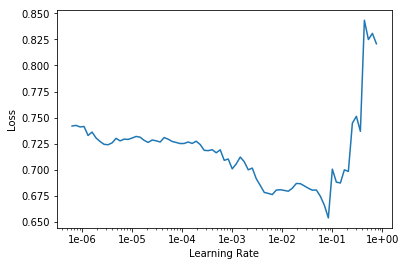

In [9]:
learn.recorder.plot()

In [10]:
learn.fit(4,learning_rate, wd=wd)

Total time: 00:34
epoch  train_loss  valid_loss  accuracy
1      0.644596    0.662803    0.606178  (00:09)
2      0.627938    0.685435    0.532819  (00:09)
3      0.654730    0.675642    0.540541  (00:08)
4      0.657841    0.632707    0.683398  (00:07)



In [11]:
learn.unfreeze()
learn.fit(epochs,learning_rate, wd=wd)

Total time: 07:25
epoch  train_loss  valid_loss  accuracy
1      0.604367    0.653479    0.610039  (00:23)
2      0.561438    0.615732    0.687259  (00:25)
3      0.615760    0.563940    0.760618  (00:18)
4      0.596505    0.699311    0.617761  (00:21)
5      0.551879    0.665301    0.671815  (00:23)
6      0.523401    0.637879    0.667954  (00:23)
7      0.539030    0.564053    0.745174  (00:23)
8      0.482938    0.498984    0.768340  (00:24)
9      0.477275    0.479605    0.799228  (00:23)
10     0.529472    0.481138    0.776062  (00:19)
11     0.470727    0.456704    0.814672  (00:22)
12     0.467185    0.433349    0.833977  (00:20)
13     0.446981    0.439139    0.810811  (00:21)
14     0.447163    0.436778    0.833977  (00:21)
15     0.429853    0.480080    0.779923  (00:20)
16     0.398320    0.422807    0.822394  (00:23)
17     0.401312    0.400701    0.837838  (00:20)
18     0.318196    0.389891    0.853282  (00:26)
19     0.382900    0.449176    0.826255  (00:19)
20     0.35

In [12]:
learn.validate()

[0.3852999, tensor(0.8764)]

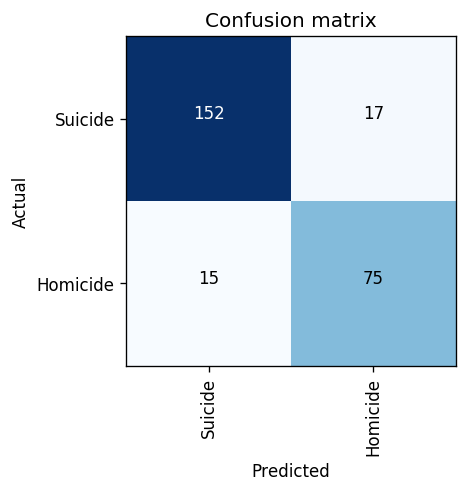

In [13]:
accuracy_list.append(learn.validate()[1].item())
interp = ClassificationInterpretation.from_learner(learn)
interp.plot_confusion_matrix(figsize=(4,4), dpi=120)

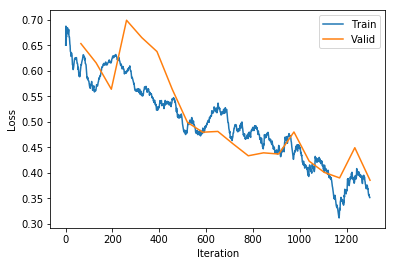

In [14]:
learn.recorder.plot_losses()

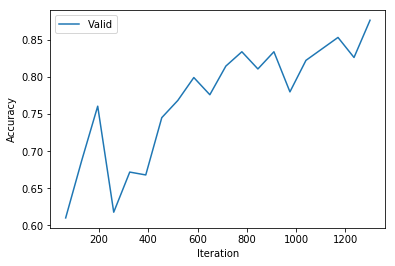

In [15]:
learn.recorder.plot_metrics()

In [16]:
data_clas = TextClasDataBunch.from_csv(path_clas,folds[1], vocab=data_lm.train_ds.vocab, classes=['Suicide','Homicide'],bs=batch_size)

learn = text_classifier_learner(data_clas, drop_mult=drop_mult)
learn.load_encoder('enc_autopsy_only_pretrained')

learn.freeze()

In [17]:
learn.lr_find()

LR Finder complete, type {learner_name}.recorder.plot() to see the graph.


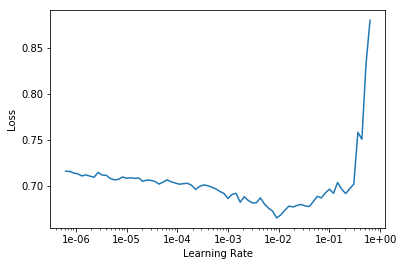

In [18]:
learn.recorder.plot()

In [19]:
learn.fit(4,learning_rate, wd=wd)

Total time: 00:35
epoch  train_loss  valid_loss  accuracy
1      0.684694    0.675691    0.579151  (00:08)
2      0.627436    0.670801    0.613900  (00:09)
3      0.584173    0.641114    0.621622  (00:09)
4      0.610971    0.619895    0.644788  (00:08)



In [20]:
learn.unfreeze()
learn.fit(epochs,learning_rate, wd=wd)

Total time: 07:13
epoch  train_loss  valid_loss  accuracy
1      0.545639    0.574002    0.733591  (00:25)
2      0.553653    0.655623    0.629344  (00:23)
3      0.544300    0.708096    0.625483  (00:23)
4      0.574700    0.653811    0.660232  (00:20)
5      0.564212    0.581316    0.698842  (00:20)
6      0.555247    0.593694    0.714286  (00:21)
7      0.539645    0.556199    0.737452  (00:19)
8      0.509636    0.501125    0.752896  (00:22)
9      0.523690    0.531593    0.729730  (00:19)
10     0.525211    0.488953    0.814672  (00:18)
11     0.500884    0.497682    0.799228  (00:19)
12     0.485313    0.457581    0.830116  (00:19)
13     0.467096    0.424857    0.830116  (00:19)
14     0.450959    0.421224    0.833977  (00:19)
15     0.448858    0.370091    0.891892  (00:20)
16     0.386333    0.409325    0.822394  (00:24)
17     0.352119    0.413320    0.837838  (00:24)
18     0.335734    0.392063    0.826255  (00:24)
19     0.360117    0.395626    0.849421  (00:21)
20     0.32

In [21]:
learn.validate()

[0.3531918, tensor(0.8417)]

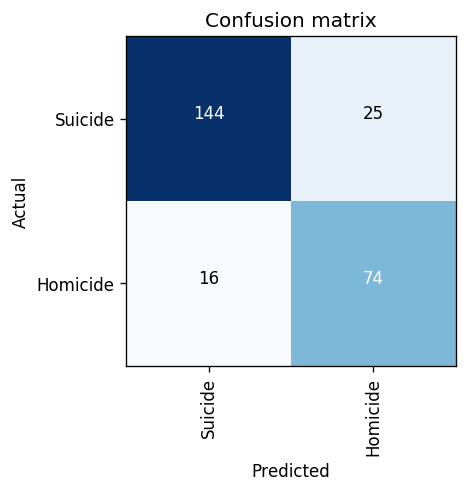

In [22]:
accuracy_list.append(learn.validate()[1].item())
interp = ClassificationInterpretation.from_learner(learn)
interp.plot_confusion_matrix(figsize=(4,4), dpi=120)

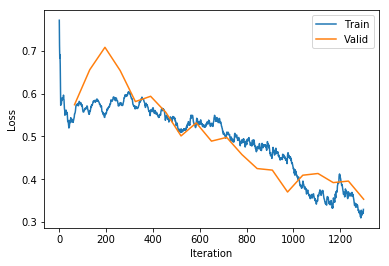

In [23]:
learn.recorder.plot_losses()

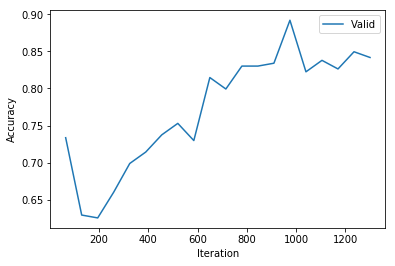

In [24]:
learn.recorder.plot_metrics()

In [25]:
data_clas = TextClasDataBunch.from_csv(path_clas,folds[2], vocab=data_lm.train_ds.vocab, classes=['Suicide','Homicide'],bs=batch_size)

learn = text_classifier_learner(data_clas, drop_mult=drop_mult)
learn.load_encoder('enc_autopsy_only_pretrained')

learn.freeze()

In [26]:
learn.lr_find()

LR Finder complete, type {learner_name}.recorder.plot() to see the graph.


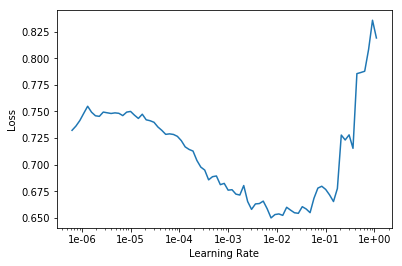

In [27]:
learn.recorder.plot()

In [28]:
learn.fit(4,learning_rate, wd=wd)

Total time: 00:31
epoch  train_loss  valid_loss  accuracy
1      0.679826    0.636341    0.625483  (00:07)
2      0.640861    0.643162    0.606178  (00:08)
3      0.636828    0.642333    0.667954  (00:07)
4      0.629610    0.637635    0.675676  (00:07)



In [29]:
learn.unfreeze()
learn.fit(epochs,learning_rate, wd=wd)

Total time: 07:15
epoch  train_loss  valid_loss  accuracy
1      0.600769    0.662904    0.625483  (00:21)
2      0.608658    0.625208    0.675676  (00:19)
3      0.586786    0.699806    0.671815  (00:20)
4      0.587017    0.668144    0.679537  (00:20)
5      0.502596    0.631890    0.687259  (00:25)
6      0.538944    0.508534    0.756757  (00:19)
7      0.506813    0.521937    0.756757  (00:21)
8      0.475426    0.492032    0.768340  (00:23)
9      0.450842    0.453795    0.795367  (00:24)
10     0.429163    0.398816    0.837838  (00:24)
11     0.473539    0.416600    0.853282  (00:20)
12     0.481058    0.394497    0.876448  (00:18)
13     0.435058    0.416863    0.861004  (00:22)
14     0.442103    0.351366    0.903475  (00:21)
15     0.410217    0.383221    0.884170  (00:22)
16     0.434811    0.348933    0.907336  (00:18)
17     0.375315    0.324899    0.895753  (00:23)
18     0.360098    0.330512    0.891892  (00:24)
19     0.329816    0.350573    0.891892  (00:22)
20     0.39

In [30]:
learn.validate()

[0.32991976, tensor(0.8842)]

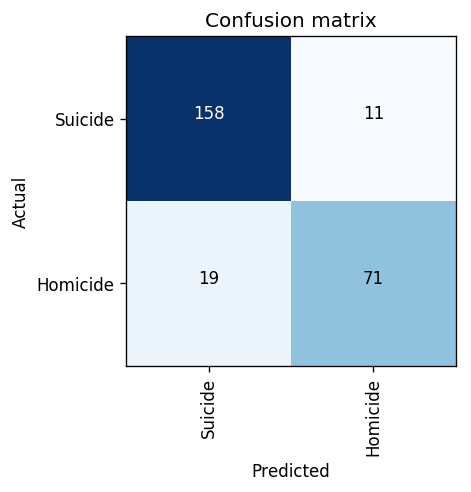

In [31]:
accuracy_list.append(learn.validate()[1].item())
interp = ClassificationInterpretation.from_learner(learn)
interp.plot_confusion_matrix(figsize=(4,4), dpi=120)

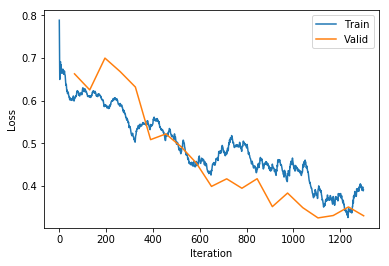

In [32]:
learn.recorder.plot_losses()

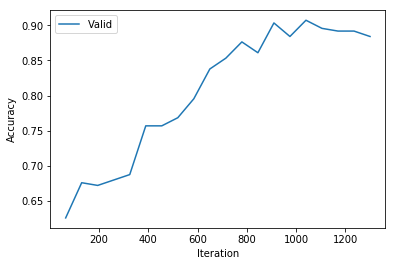

In [33]:
learn.recorder.plot_metrics()

In [34]:
data_clas = TextClasDataBunch.from_csv(path_clas,folds[3], vocab=data_lm.train_ds.vocab, classes=['Suicide','Homicide'],bs=batch_size)

learn = text_classifier_learner(data_clas, drop_mult=drop_mult)
learn.load_encoder('enc_autopsy_only_pretrained')

learn.freeze()

In [35]:
learn.lr_find()

LR Finder complete, type {learner_name}.recorder.plot() to see the graph.


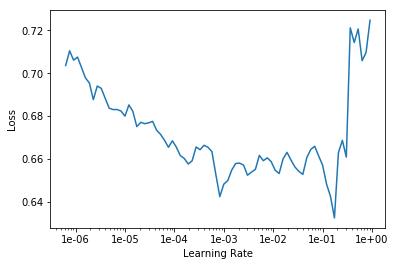

In [36]:
learn.recorder.plot()

In [37]:
learn.fit(4,learning_rate, wd=wd)

Total time: 00:34
epoch  train_loss  valid_loss  accuracy
1      0.664593    0.667159    0.598456  (00:08)
2      0.639602    0.701813    0.586873  (00:08)
3      0.626674    0.666122    0.610039  (00:08)
4      0.594586    0.678371    0.602317  (00:08)



In [38]:
learn.unfreeze()
learn.fit(epochs,learning_rate, wd=wd)

Total time: 07:07
epoch  train_loss  valid_loss  accuracy
1      0.595046    0.572016    0.691120  (00:23)
2      0.573091    0.577600    0.683398  (00:21)
3      0.570557    0.595868    0.683398  (00:20)
4      0.574872    0.549053    0.749035  (00:20)
5      0.550942    0.540661    0.764479  (00:20)
6      0.528762    0.569983    0.768340  (00:21)
7      0.517365    0.487932    0.803089  (00:22)
8      0.502013    0.431179    0.818533  (00:23)
9      0.508210    0.438501    0.799228  (00:20)
10     0.508386    0.456327    0.814672  (00:20)
11     0.465951    0.485642    0.783784  (00:22)
12     0.487199    0.413711    0.833977  (00:18)
13     0.454855    0.395051    0.841699  (00:21)
14     0.460355    0.374129    0.837838  (00:19)
15     0.434198    0.387366    0.864865  (00:20)
16     0.388310    0.325076    0.876448  (00:24)
17     0.380630    0.384597    0.853282  (00:23)
18     0.362408    0.308126    0.880309  (00:22)
19     0.412799    0.300776    0.895753  (00:19)
20     0.39

In [39]:
learn.validate()

[0.28449216, tensor(0.9151)]

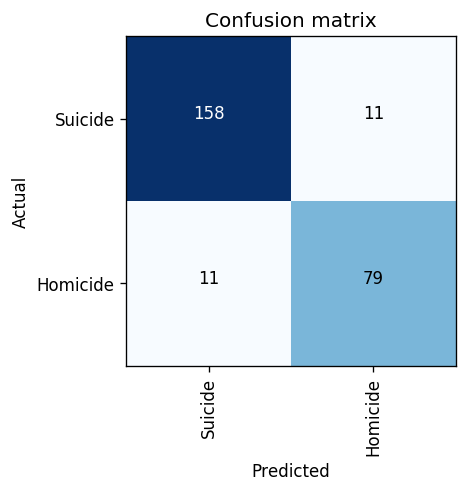

In [40]:
accuracy_list.append(learn.validate()[1].item())
interp = ClassificationInterpretation.from_learner(learn)
interp.plot_confusion_matrix(figsize=(4,4), dpi=120)

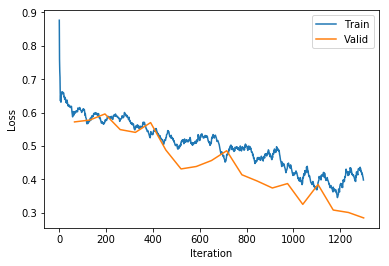

In [41]:
learn.recorder.plot_losses()

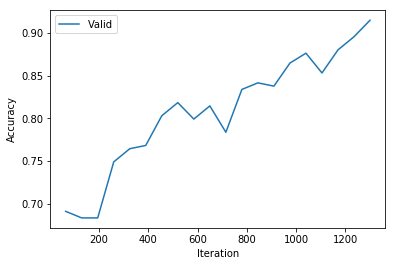

In [42]:
learn.recorder.plot_metrics()

In [43]:
data_clas = TextClasDataBunch.from_csv(path_clas,folds[4], vocab=data_lm.train_ds.vocab, classes=['Suicide','Homicide'],bs=batch_size)

learn = text_classifier_learner(data_clas, drop_mult=drop_mult)
learn.load_encoder('enc_autopsy_only_pretrained')

learn.freeze()

In [44]:
learn.lr_find()

LR Finder complete, type {learner_name}.recorder.plot() to see the graph.


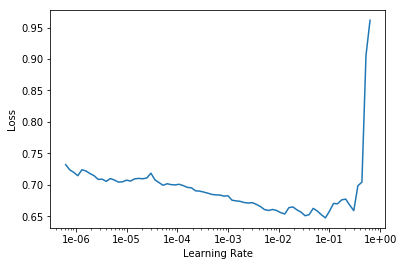

In [45]:
learn.recorder.plot()

In [46]:
learn.fit(4,learning_rate, wd=wd)

Total time: 00:35
epoch  train_loss  valid_loss  accuracy
1      0.621030    0.665410    0.598456  (00:09)
2      0.619632    0.677010    0.594595  (00:09)
3      0.594497    0.670322    0.586873  (00:09)
4      0.629930    0.703249    0.656371  (00:07)



In [47]:
learn.unfreeze()
learn.fit(epochs,learning_rate, wd=wd)

Total time: 07:21
epoch  train_loss  valid_loss  accuracy
1      0.576338    0.623771    0.671815  (00:23)
2      0.546567    0.515860    0.806950  (00:23)
3      0.537866    0.594128    0.702703  (00:22)
4      0.539294    0.505059    0.752896  (00:24)
5      0.552301    0.535486    0.710425  (00:21)
6      0.531620    0.498140    0.749035  (00:20)
7      0.565638    0.525874    0.772201  (00:18)
8      0.543893    0.490544    0.799228  (00:19)
9      0.499817    0.419468    0.845560  (00:21)
10     0.495264    0.457533    0.841699  (00:19)
11     0.436165    0.490267    0.818533  (00:25)
12     0.395326    0.398472    0.845560  (00:24)
13     0.380489    0.339782    0.876448  (00:24)
14     0.378696    0.365491    0.872587  (00:23)
15     0.335382    0.340857    0.891892  (00:24)
16     0.346567    0.363982    0.868726  (00:24)
17     0.375835    0.352952    0.857143  (00:22)
18     0.383293    0.298688    0.888031  (00:19)
19     0.426333    0.308187    0.880309  (00:18)
20     0.41

In [48]:
learn.validate()

[0.3507879, tensor(0.8610)]

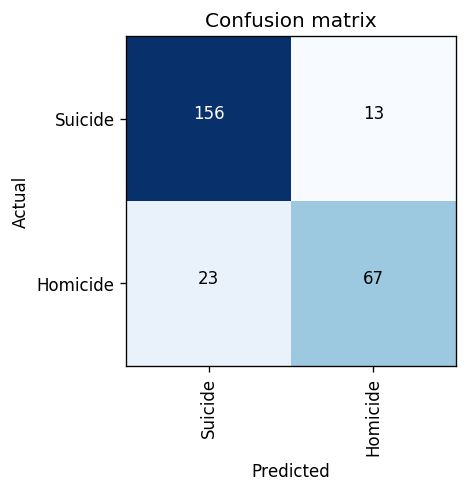

In [49]:
accuracy_list.append(learn.validate()[1].item())
interp = ClassificationInterpretation.from_learner(learn)
interp.plot_confusion_matrix(figsize=(4,4), dpi=120)

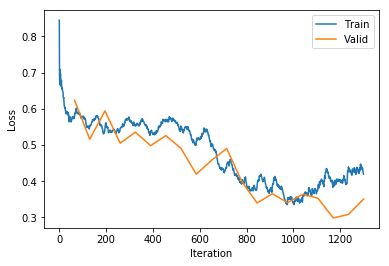

In [50]:
learn.recorder.plot_losses()

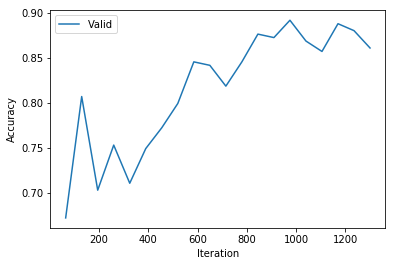

In [51]:
learn.recorder.plot_metrics()

In [52]:
print(accuracy_list)

[0.876447856426239, 0.8416988253593445, 0.88416987657547, 0.915057897567749, 0.8610038757324219]


In [53]:
print(sum(accuracy_list)/len(accuracy_list))

0.8756756663322449


In [54]:
print(statistics.variance(accuracy_list))

0.0007483487960467273


In [55]:
import torch

torch.cuda.empty_cache()